# **Manto de Markov**
El manto de Markov, Cadenas de Markov o Envolvente de Markov es un concepto bastante amplio y usado en el campo de las redes Bayesianas. Este explica la dependencia de un nodo a otro dada una probabilidad, teniendo así una especie de inferencia, utilizada desde procesos estocásticos hasta modelos de IA. Este concepto funciona para predecir un estado futuro de un sistema dado los estados actuales del presente, es decir, es independiente del tiempo pasado, lo que como variable afecta el cálculo del futuro.

En un análisis más psicológico sobre los procesos cognitivos, tiene aplicaciones en la toma de decisiones, la percepción y el aprendizaje. Este documento se centra en estos dos últimos puntos: la percepción y el aprendizaje.

En algunos modelos de la memoria, podemos representar estas memorias como "nodos". Dichas memorias tienen relaciones entre sí, las cuales podemos desarrollar como aristas dentro de un grafo. La transición de un estado a otro la determina una probabilidad, lo que nos da como resultado una cadena de Markov. El modelo que aquí se propone no implica dependencias de un nodo a otro, sino que desarrolla la idea de cómo una serie de nodos se puede diferenciar (estructuralmente hablando, creando un subgrafo), basados en las conexiones actuales. Es decir, dado un grupo determinado de nodos cuyo valor real es una característica de un objeto, estando conectados todos entre sí, pero su tipo de conexión o relación es determinado, la manera en la que se recorra dicho grafo determina un objeto real.

Dentro de un análisis de toma de decisiones, las decisiones que toma un individuo están determinadas por las memorias. Es decir, las decisiones que tomamos tienen su origen en cómo actuamos anteriormente ante una problemática. Dadas esas memorias, creamos una relación. Superficialmente hablando, podemos decir que el resultado de una situación se da en función de si fue bueno o malo.

Tomando este ejemplo, si abstraemos las situaciones, todas tendrán características, y algunas de ellas compartirán dichas características. Por lo que las relaciones en todo el mapa podrían inclinarse más hacia los nodos que simbolizan un sí o un no o, en términos del ejemplo, mi acción es buena o mala.

Para la abstracción de la información, el mecanismo es similar. Cuando mapeamos un conjunto de objetos, dichos objetos podrán compartir características como color, forma, olor, etc. Por ello, cuando aprendemos sobre algo nuevo, la mente trata de asimilar las características nuevas a lo que ya se conoce: "parece un cuadrado", "es como color naranja", "sabe a fresas", etc.

Por ende, un aprendizaje por un modelo basado en esta arquitectura no depende de las probabilidades según mi pasado o mi presente, sino que depende de cómo estas nuevas características se logran conectar o asimilar con el resto de características existentes. Es decir, no es un aprendizaje basado en probabilidad, sino un aprendizaje basado en razonamiento.

In [120]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

#### **NetworkX**
NetworkX es una librería estándar para el manejo y creación de grafos. Esta herramienta cuenta con múltiples funciones, desde algoritmos básicos de recorrido y métodos de creación de grafos, hasta funciones más complejas enfocadas en el análisis de grafos.

Una de las principales razones por las cuales se decidió utilizar esta librería es su flexibilidad para incorporar información tanto en las conexiones como en los nodos. Esto permite tipificar dichas conexiones y nodos, lo que resulta esencial para los objetivos del modelo.

Para explorar las propiedades que se utilizarán a lo largo del modelo y del presente documento, se utiliza un ejemplo trivial, que en este caso son sistemas planetarios. Las estrellas se conectan entre sí por el tipo de conexión "pertenencia a una galaxia", mientras que los planetas se conectan por "pertenencia a una galaxia" y "pertenencia a un sistema planetario".

De esta forma, podemos revisar los diferentes métodos que la librería NetworkX tiene para manejar diferentes tipos de conexión o diferentes tipos de nodos, como lo es el filtrado por "data". La "data" es toda la información que se le puede dar a diferentes elementos de un grafo, como lo son las aristas y los nodos. Dicha "data" nos ayuda a filtrar ciertas propiedades, lo que nos permite crear subgrafos de grafos más grandes, filtrándolos por su tipo de conexión o, más técnicamente, por su "data".

Estas características nos permitirán más adelante poder renderizar objetos, interpretar conexiones, y, dada la naturaleza de ciertos elementos, lo mejor sería cambiar las conexiones de tipos determinados por un string a conexiones determinadas por pesos, o usar los pesos como codificaciones y poder explorar el grafo de una manera más real.

In [121]:
# Construccion de un grafo
graph=nx.Graph()

# Datos sinteticos para demostracion de metodos
estrellas=["Sol", "TRAPPIST-1", "Proxima_Centauri"]
planetas_sol=["Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", "Urano", "Neptuno"]
planetas_trappist=["TRAPPIST-1b", "TRAPPIST-1c", "TRAPPIST-1d", "TRAPPIST-1e", "TRAPPIST-1f", "TRAPPIST-1g", "TRAPPIST-1h"]
planetas_centauri=["Proxima_Centauri_b", "Proxima_Centauri_c", "Proxima_Centauri_d"]
planetas_general=[planetas_sol, planetas_trappist, planetas_centauri]
planetas_totales=planetas_sol+planetas_trappist+planetas_centauri

# Añadimos los nodos desde las listas
graph.add_nodes_from(estrellas, type="estrella")
graph.add_nodes_from(planetas_sol, type="planeta")
graph.add_nodes_from(planetas_centauri, type="planeta")
graph.add_nodes_from(planetas_trappist, type="planeta")

# Interconectamos todos los nodos que formen parte del mismo sistema planetario
for i in range(len(planetas_sol)-1):
    graph.add_edge(planetas_sol[i], planetas_sol[i+1], system="Sol")

for i in range(len(planetas_trappist)-1):
    graph.add_edge(planetas_trappist[i], planetas_trappist[i+1], system="TRAPPIST-1")

for i in range(len(planetas_centauri)-1):
    graph.add_edge(planetas_centauri[i], planetas_centauri[i+1], system="Proxima_Centauri")

# Interconectamos todas las estrellas que formen parte del mismo tipo de entidad en su propia galaxia
for nodo1, nodo2 in itertools.combinations(estrellas, 2):
    graph.add_edge(nodo1, nodo2, connection_type="Via_Lactea_Estrellas")

for nodo1, nodo2 in itertools.combinations(planetas_totales, 2):
    graph.add_edge(nodo1, nodo2, connection_type="Via_Lactea_Planetas")

# Asignamos los planetas a sus estrellas
for estrella in estrellas:
    for planeta in planetas_general[estrellas.index(estrella)]:
        graph.add_edge(estrella, planeta, connection_type=f"Sistema_de_{estrella}")

# Imprimos los nodos de un mismo tipo
def nodos_conectados(connection_type):
    nodes_with_connection=set()
    for u, v, attrs in graph.edges(data=True):
        if attrs.get("connection_type")==connection_type:
            nodes_with_connection.update([u, v])
    return nodes_with_connection

for estrella in estrellas:
    print(f"Nodos con conexión de tipo 'Sistema_de_{estrella}': {nodos_conectados(f"Sistema_de_{estrella}")}")


Nodos con conexión de tipo 'Sistema_de_Sol': {'Urano', 'Jupiter', 'Venus', 'Tierra', 'Marte', 'Saturno', 'Sol', 'Neptuno', 'Mercurio'}
Nodos con conexión de tipo 'Sistema_de_TRAPPIST-1': {'TRAPPIST-1b', 'TRAPPIST-1e', 'TRAPPIST-1g', 'TRAPPIST-1c', 'TRAPPIST-1f', 'TRAPPIST-1', 'TRAPPIST-1h', 'TRAPPIST-1d'}
Nodos con conexión de tipo 'Sistema_de_Proxima_Centauri': {'Proxima_Centauri_d', 'Proxima_Centauri_b', 'Proxima_Centauri_c', 'Proxima_Centauri'}


In [122]:
# Imprimos nodos de un tipo caracteristico
planetas=[node for node, data in graph.nodes(data=True) if data.get("type")=="planeta"]
print(f"Planetas: {planetas}")

estrellas=[node for node, data in graph.nodes(data=True) if data.get("type")=="estrella"]
print(f"Estrellas: {estrellas}")

Planetas: ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Jupiter', 'Saturno', 'Urano', 'Neptuno', 'Proxima_Centauri_b', 'Proxima_Centauri_c', 'Proxima_Centauri_d', 'TRAPPIST-1b', 'TRAPPIST-1c', 'TRAPPIST-1d', 'TRAPPIST-1e', 'TRAPPIST-1f', 'TRAPPIST-1g', 'TRAPPIST-1h']
Estrellas: ['Sol', 'TRAPPIST-1', 'Proxima_Centauri']


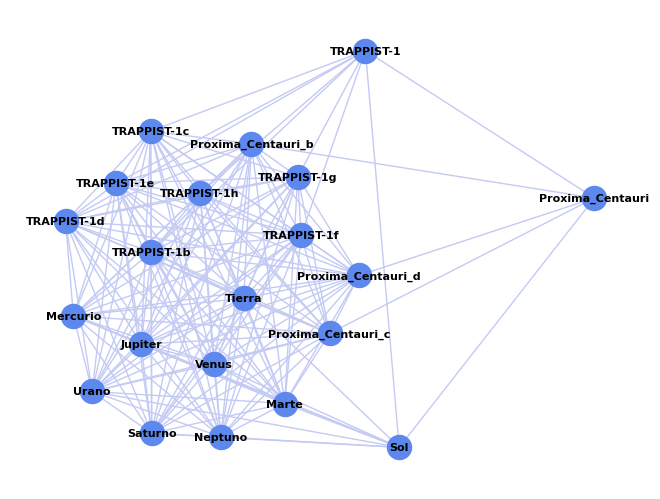

In [123]:
# Mostrar grafo
nx.draw(graph, with_labels=True, font_size=8, font_weight='bold', node_color="#5D88ED", edge_color="#C3CAF4")
plt.show()

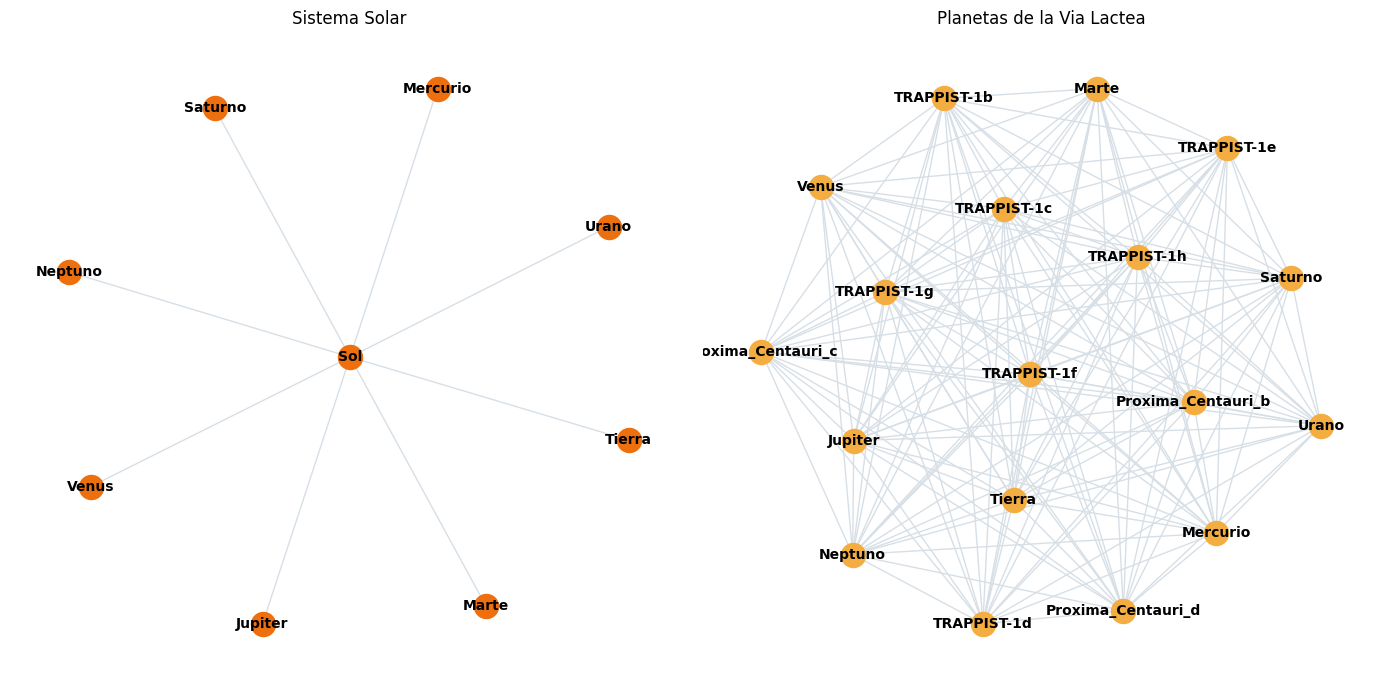

In [124]:
# Creamos un subgrafo para el sistema solar
edges_sistema_sol=[(u, v) for u, v, data in graph.edges(data=True) if data['connection_type']=="Sistema_de_Sol"]
subgraph_sistema_sol=graph.edge_subgraph(edges_sistema_sol)

# Creamos un subgrafo para el sistema solar
planetas_vialactea=[(u, v) for u, v, data in graph.edges(data=True) if data['connection_type']=="Via_Lactea_Planetas"]
graph_planetas=graph.edge_subgraph(planetas_vialactea)

# Mostramos los subgrafos
fig, axes=plt.subplots(1, 2, figsize=(14, 7))
nx.draw(subgraph_sistema_sol, with_labels=True, node_color="#ED6F0E", font_size=10, font_weight='bold', ax=axes[0], edge_color="#D7DFE6")
axes[0].set_title("Sistema Solar")
nx.draw(graph_planetas, with_labels=True, node_color="#F4AD40", font_size=10, font_weight='bold', ax=axes[1], edge_color="#D7DFE6")
axes[1].set_title("Planetas de la Via Lactea")
plt.tight_layout() 
plt.show()

### **Desarrollo**

Para explicar de manera un poco menos abstracta el funcionamiento del modelo, se aborda un ejemplo basado en diferentes "contenedores", utilizando las conexiones triviales, es decir, con el tipo "string", antes de modelar la abstracción de un objeto mediante codificaciones numéricas. Priemero crearemos una lista de objetos, para este ejemplo sera ["botella", "vaso", "copa", "ventana", "puerta"].

En la lista existen diferentes objetos que aunque algunos de ellos tiene un proposito en comun, el proposito de momento no es una cualidad que nos importe, especial aqui es notar las caracteristicas que componen al objeto.

In [162]:
# Mapa de carcateristicas por objeto
botella_caracteristicas=[
    "plástico", "vidrio", "metal", "cerámica",
    "cilíndrica", "rectangular", "triangular",
    "pequeña", "mediana", "grande",
    "250ml", "500ml", "1l", "2l",
    "transparente", "verde", "marrón", "blanco", "negro", "metálico",
    "tapa_rosca", "tapa_presion",
    "alta_resistencia", "media_resistencia", "baja_resistencia",
    "básico", "decorado", "etiquetas", "personalizado",
    "alta_reciclabilidad", "media_reciclabilidad", "baja_reciclabilidad",
    "logo"
]

vaso_caracteristicas=[
    "vidrio", "plástico", "cerámica", "metal",
    "cilíndrica", "cónica", "cuadrada", "ovalada",
    "pequeño", "mediano", "grande",
    "200ml", "300ml", "500ml",
    "transparente", "de_color", "opaco",
    "clásico", "moderno", "vintage",
    "agua", "jugos", "refrescos", "bebidas_alcoholicas",
    "simple", "decorado", "grabados",
    "alta_resistencia", "media_resistencia", "baja_resistencia",
    "logo",
    "fácil_transportar", "difícil_transportar"
]

copa_caracteristicas=[
    "cristal", "vidrio", "plástico",
    "redonda", "tulipán", "campana",
    "pequeña", "mediana", "grande",
    "100ml", "150ml", "250ml", "500ml",
    "transparente", "de_colores", "decoraciones",
    "vino", "champán", "cócteles", "postres",
    "elegante", "clásico", "moderno", "artístico",
    "vino_tinto", "vino_blanco", "champán", "cocktail",
    "alta_resistencia", "media_resistencia", "baja_resistencia",
    "fácil_limpieza", "dificil_limpieza",
    "alta_fragilidad", "media_fragilidad", "baja_fragilidad",
    "grabado", "logo"
]

ventana_caracteristicas=[
    "madera", "aluminio", "pvc", "vidrio",
    "corrediza", "abatible", "oscilobatiente", "guillotina",
    "pequeña", "mediana", "grande",
    "paso_luz", "ventilación",
    "moderna", "clásica", "rústica", "minimalista",
    "blanco", "negro", "madera_natural", "colores_metálicos",
    "alta_resistencia", "media_resistencia", "baja_resistencia",
    "aislamiento_térmico", "aislamiento_acústico", "doble_acristalamiento",
    "fácil_abrir", "difícil_abrir",
    "rejas", "seguro",
    "interior", "exterior",
    "transparente", "opaco", "tintado", "seguridad"
]

puerta_caracteristicas=[
    "madera", "metal", "vidrio", "pvc",
    "corrediza", "abatible", "plegable", "doble",
    "estándar", "personalizado",
    "acceso", "privacidad", "seguridad",
    "clásico", "moderno", "rústico", "contemporáneo",
    "madera_natural", "blanca", "negra", "metálica",
    "alta_resistencia", "media_resistencia", "baja_resistencia",
    "aislamiento_térmico", "aislamiento_acústico",
    "cerradura", "cerrojo",
    "simple", "decorada", "paneles", "vidriada",
    "interior", "exterior",
    "fácil_abrir", "difícil_abrir",
    "fija", "móvil",
    "fácil_instalar", "complicada_instalar"
]

# Diciconario de objetos
objetos={
    "vaso": vaso_caracteristicas,
    "botella": botella_caracteristicas,
    "copa": copa_caracteristicas,
    "puerta": puerta_caracteristicas,
    "ventana": ventana_caracteristicas
}

# Creamos un set con todas las cracteristicas
caracteristicas=botella_caracteristicas+vaso_caracteristicas+copa_caracteristicas+puerta_caracteristicas+ventana_caracteristicas
caracteristicas=list(set(caracteristicas))

# Mapemos todas las entidades como grafos
grafo_objetos=nx.MultiGraph()

grafo_objetos.add_node("vaso")
grafo_objetos.add_node("botella")
grafo_objetos.add_node("copa")
grafo_objetos.add_node("puerta")
grafo_objetos.add_node("ventana")
grafo_objetos.add_nodes_from(caracteristicas, type="carcaterisitca")

# Conectamos las carcateristicas a los nodos principales
def conexiones(caracteristicas, objeto):
    for caracteristica in caracteristicas:
        grafo_objetos.add_edge(objeto, caracteristica, connection_type=f"c{objeto}")

for objeto in objetos:
    conexiones(objetos[objeto], objeto)

De la manera en la que se hizo el mapa se puede notar algo, se definio el objeto como un nodo parte de la secuencia, lo cual rompe el proposito del modelo, pero aqui el punto es poder ver de manera superficial, como se comparten diversas caracteristicas de un objeto.

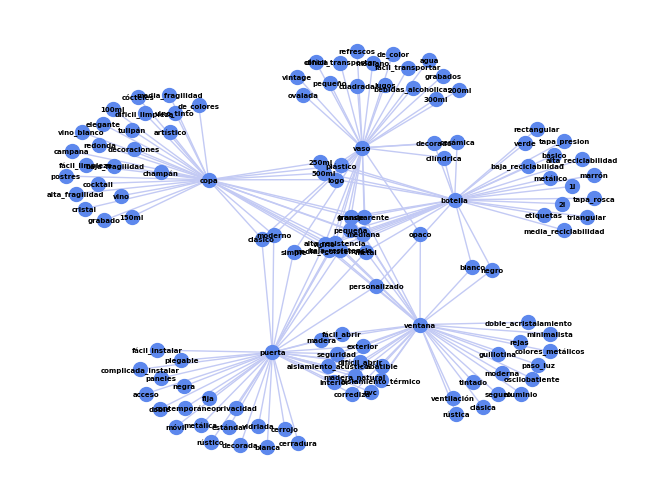

In [163]:
# Mostrar grafo
nx.draw(grafo_objetos, with_labels=True, font_size=5, font_weight='bold', node_color="#5D88ED", edge_color="#C3CAF4", node_size=100)
plt.show()

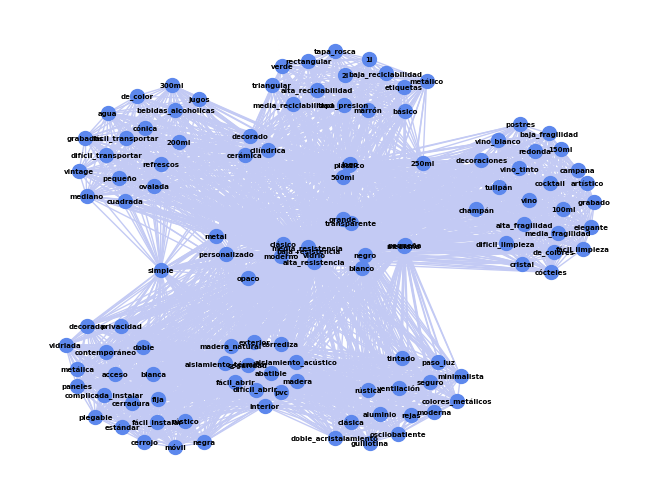

In [164]:
# Creamos un nuevo grafo de carcateristicas
grafo_caracteristicas=nx.MultiGraph()

# Cargamos al grafo de las carcateristicas pertinentes
grafo_caracteristicas.add_nodes_from(caracteristicas, type="carcateristicas")

# Funcioin de conexion
def conexiones_caracteristicas(entidad, caracteristicas):
    for nodo1, nodo2 in itertools.combinations(caracteristicas, 2):
        grafo_caracteristicas.add_edge(nodo1, nodo2, connection_type=f"{entidad}")

for objeto in objetos:
    conexiones_caracteristicas(str(objeto), objetos[objeto])

# Mostrar grafo
nx.draw(grafo_caracteristicas, with_labels=True, font_size=5, font_weight='bold', node_color="#5D88ED", edge_color="#C3CAF4", node_size=100)
plt.show()

Teniendo ya un grafo total de las caracteristicas de cada uno de los objetos podemos crear un subgrafo del grafo orginal, lo cual determina o radica mas bien en un objeto conformado por el cumulo de ccrcateristicas existentes

In [166]:
# Creamos un subgrafo para el sistema solar
vaso_edges=[(u, v, k) for u, v, k, data in grafo_caracteristicas.edges(data=True, keys=True) if data['connection_type'] == "vaso"]
subgraph_vaso=grafo_caracteristicas.edge_subgraph(vaso_edges)
print(f"Caracteristicas de vaos: {len(subgraph_vaso.nodes)} de {len(vaso_caracteristicas)}")

# Creamos un subgrafo para el sistema solar
botella_edges=[(u, v, k) for u, v, k, data in grafo_caracteristicas.edges(data=True, keys=True) if data['connection_type'] == "botella"]
subgraph_botella=grafo_caracteristicas.edge_subgraph(botella_edges)
print(f"Caracteristicas de botella: {len(subgraph_botella)} de {len(botella_caracteristicas)}")

Caracteristicas de vaos: 33 de 33
Caracteristicas de botella: 33 de 33


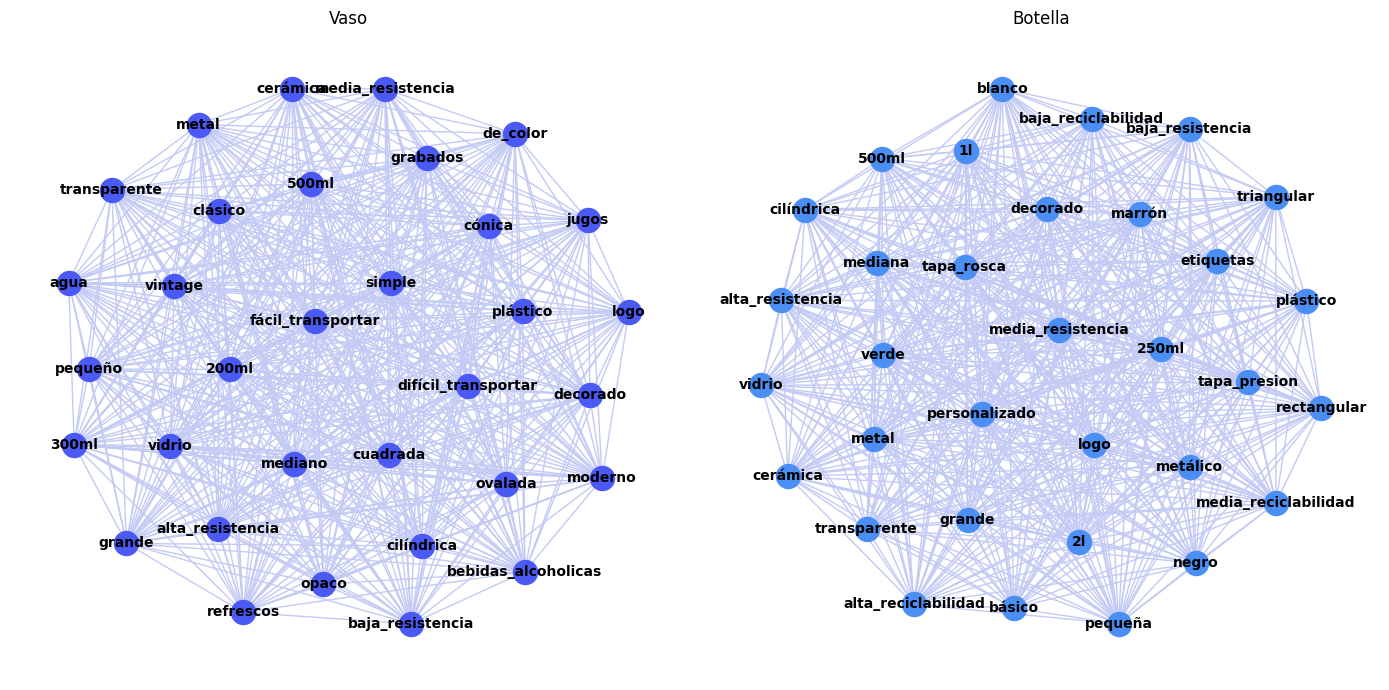

In [167]:

# Mostramos los subgrafos
fig, axes=plt.subplots(1, 2, figsize=(14, 7))
nx.draw(subgraph_vaso, with_labels=True, node_color="#4C5AF5", font_size=10, font_weight='bold', ax=axes[0], edge_color="#C3CAF4")
axes[0].set_title("Vaso")
nx.draw(subgraph_botella, with_labels=True, node_color="#4B8FF4", font_size=10, font_weight='bold', ax=axes[1], edge_color="#C3CAF4")
axes[1].set_title("Botella")
plt.tight_layout() 
plt.show()